In [2]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt

In [3]:
df_ref = pd.read_csv('Output_SolarWind\\df_final_SI_combined_SolarWind_exc.csv')
df_solar = df_ref.drop(columns=['geometry'])
df_solar = df_solar.loc[df_solar['from_pol_solar_id']>0]
df_wind = df_ref.drop(columns=['geometry'])
df_wind = df_wind.loc[df_wind['from_pol_wind_id']>0]

df_ref['geometry'] = df_ref['geometry'].apply(wkt.loads)
df_solar['geometry'] = df_solar['solar_area_coord'].apply(wkt.loads)
df_wind['geometry'] = df_wind['wind_area_coord'].apply(wkt.loads)

df_ref = gpd.GeoDataFrame(df_ref, crs='epsg:4326')
df_solar = gpd.GeoDataFrame(df_solar, crs='epsg:4326')
df_wind = gpd.GeoDataFrame(df_wind, crs='epsg:4326')


      index  pol_id                                           geometry  \
2229   2229    2309  POLYGON ((102.15556 17.66111, 102.18333 17.661...   

          area  from_pol_wind_id   wind_SI  wind_area  \
2229  315.2142                 2  1.852177   251.7268   

                                        wind_area_coord  from_pol_solar_id  \
2229  MULTIPOLYGON (((102.15555555555558 17.66111111...                  1   

      solar_SI  solar_area                                   solar_area_coord  \
2229  1.929571    315.2142  POLYGON ((102.15555555555558 17.66111111111112...   

               ADM1_EN      ADM1_TH region  contain_exs  
2229  Nong Bua Lam Phu  หนองบัวลำภู     R2            0  


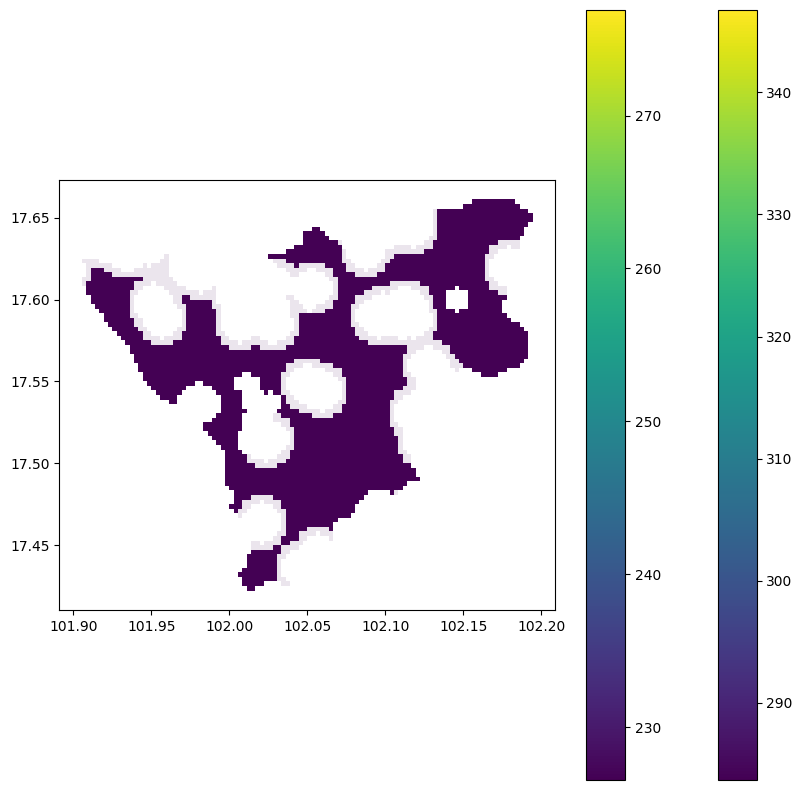

In [5]:
# thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
# thailandmap.crs = {'init': 'epsg:4326'}

fig, ax = plt.subplots(figsize=(10,10))
# thailandmap.plot(ax = ax, color='none', edgecolor = 'white', zorder = 0)
# df_ref.plot(ax = ax,column = 'wind_SI', alpha = 0.1, zorder = 1)
df_ref.loc[df_ref['area'] == df_ref['area'].max()].plot(ax = ax,legend=True,zorder = 2,alpha = 0.1,column = 'area')
# df_solar.loc[df_solar['area'] == df_solar['area'].max()].plot(ax = ax,legend=True,zorder = 3,alpha = 1,column = 'solar_area')
df_wind.loc[df_wind['area'] == df_wind['area'].max()].plot(ax = ax,legend=True,zorder = 3,alpha = 1,column = 'wind_area')

print(df_ref.loc[df_ref['area'] == df_ref['area'].max()])

